<a href="https://colab.research.google.com/github/EteimZ/Deep_Learning-Notebooks/blob/main/Pytorch/Simple_Linear_Regression_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

In this notebook I will perform a simple linear regression with Pytorch

In [134]:
import torch
import torch.nn as nn

$$y= x * W + b $$

The equation above is a linear model where $ W $ is the weight, $ b $ is the bias , $x$ is the input variable and $y$ is the output. I am going to generate random values of $x$ and $y$ (which will be dependent on $x$) with random noise. 

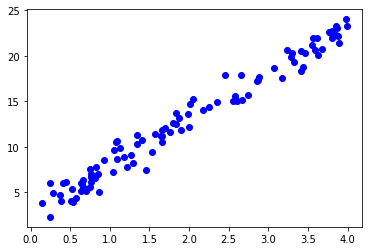

In [135]:
# generate random v
X = 4 * torch.rand(100, 1)
y = 3 + 5 * X + torch.randn(100, 1)

plt.scatter(X, y, c="b")

Creating a linear model in pytorch is quite easy all we need is the *torch.nn.Linear* class, set the input dimension and output dimension to one because our linear model takes in one input($x$) and returns one output($y$).

The *torch.nn.Linear* class handles our Weights and biases for us by initializing random values.

In [136]:
input_dim = 1
output_dim = 1
model = nn.Linear(input_dim, output_dim)

Lets check our Weight and bias.

In [137]:
[w, b] = model.parameters()
print(f'weight = {w.item():.3f}, bias = {b.item():.3f}')

weight = -0.405, bias = 0.024


Our weight and bias are completely random, now we have to adjust their values. In other to adjust our values we need a loss function and an optimzer.

The loss function will tell us the difference between the actual values and the predicted values, the loss used in this case is the 
*Mean Squared Error* :


 $$ MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i})^2$$

 Where $y_i$ are the actual values and $\hat{y_i}$ are the predicted values. 

 While the optimizer will adjust the weight and bias, the optimizer used is *Stochastic gradient descent*. 

In [138]:
#pytorch implementation
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

The process of adjusting the weights and biases is an iterative one, so we need a training loop.

In [139]:
n_iters = 30

for epoch in range(n_iters):
  # Input the X values to the model
  y_pred = model(X)

  # Calculate the loss
  l = loss(y, y_pred)

  # Calculate the the gradients
  l.backward()

  # Update weights and biases
  optimizer.step()
  optimizer.zero_grad()

  
  [w, b] = model.parameters() # unpack parameters
  print(f'epoch {epoch+1} : w = {w[0].item():.3f} bias =  {b.item():.3f} loss =  {l.item():.3f}')



epoch 1 : w = 0.285 bias =  0.296 loss =  229.106
epoch 2 : w = 0.892 bias =  0.535 loss =  177.448
epoch 3 : w = 1.425 bias =  0.745 loss =  137.495
epoch 4 : w = 1.894 bias =  0.931 loss =  106.595
epoch 5 : w = 2.306 bias =  1.094 loss =  82.697
epoch 6 : w = 2.669 bias =  1.238 loss =  64.214
epoch 7 : w = 2.988 bias =  1.365 loss =  49.919
epoch 8 : w = 3.268 bias =  1.477 loss =  38.863
epoch 9 : w = 3.514 bias =  1.576 loss =  30.312
epoch 10 : w = 3.730 bias =  1.663 loss =  23.699
epoch 11 : w = 3.921 bias =  1.740 loss =  18.584
epoch 12 : w = 4.088 bias =  1.807 loss =  14.627
epoch 13 : w = 4.235 bias =  1.868 loss =  11.568
epoch 14 : w = 4.364 bias =  1.921 loss =  9.201
epoch 15 : w = 4.477 bias =  1.968 loss =  7.370
epoch 16 : w = 4.577 bias =  2.009 loss =  5.955
epoch 17 : w = 4.664 bias =  2.046 loss =  4.859
epoch 18 : w = 4.741 bias =  2.079 loss =  4.012
epoch 19 : w = 4.809 bias =  2.108 loss =  3.357
epoch 20 : w = 4.868 bias =  2.134 loss =  2.850
epoch 21 : w

In [140]:
print(f'Weights and bias after training: w: {w.item():.3f} b: {b.item():.3f}')

Weights and bias after training: w: 5.176 b: 2.280


Let's plot our predicted values:

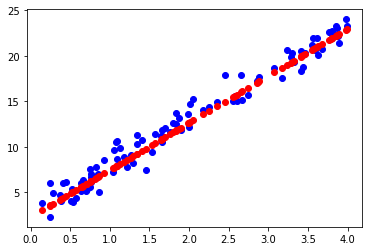

In [142]:
pred = model(X).detach()
plt.plot(X, y, 'bo')
plt.plot(X, pred, 'ro')


There we have it, that is how to implement simple linear regression in pytorch.
